In [1]:
"""
This script analyses the effect on prediction and data integration
of leaving a batch out of training
"""

# imports
import os
import pandas as pd
import numpy as np
import scvi
import torch
import anndata as ad
import mudata as md
from omicsdgd import DGD
import matplotlib.pyplot as plt
import seaborn as sns
import umap
#from sklearn.metrics import silhouette_score

/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not suppli

### human bonemarrow

In [2]:
####################
# collect test errors per model and sample
####################
# load data
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
testset = adata[test_indices, :].copy()
batches = trainset.obs["Site"].unique()
test_batches = testset.obs["Site"].values

In [3]:
# plot the test latent space of the original moel trained on all sites
model_name = "human_bonemarrow_l20_h2-3_test50e"

model = DGD.load(
    data=trainset,
    save_dir=save_dir + data_name + "/",
    model_name=model_name,
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True


In [15]:
test_covariate_clusters = torch.argmax(model.correction_gmm.sample_probs(model.correction_test_rep.z),dim=-1).to(torch.int16)
# loop through the unique batches and calculate the accuracy of the test set
test_accuracy = []
for i, batch in enumerate(batches):
    pos = np.where(test_batches == batch)[0]
    neg = np.where(test_batches != batch)[0]
    tp = (test_covariate_clusters[pos] == i).sum()
    tn = (test_covariate_clusters[neg] != i).sum()
    test_accuracy.append(((tp + tn) / len(test_batches)).item())
print("test accuracy of the original model trained on all sites: ", test_accuracy)
print("batches: ", batches)

test accuracy of the original model trained on all sites:  [0.9667869806289673, 0.9316967725753784, 0.9392057657241821, 0.991913378238678]
batches:  ['site1', 'site2', 'site3', 'site4']
Categories (4, object): ['site1', 'site2', 'site3', 'site4']


In [16]:
# save in a dataframe
df = pd.DataFrame()
df["batch"] = batches
df["test_accuracy"] = test_accuracy
df["random_seed"] = 0

In [17]:
model = None

In [18]:
# plot the test latent space of the original moel trained on all sites
model_name = "human_bonemarrow_l20_h2-3_rs37"

model = DGD.load(
    data=trainset,
    save_dir=save_dir + data_name + "/",
    model_name=model_name,
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True


In [19]:
test_covariate_clusters = torch.argmax(model.correction_gmm.sample_probs(model.correction_test_rep.z),dim=-1).to(torch.int16)
# loop through the unique batches and calculate the accuracy of the test set
test_accuracy = []
for i, batch in enumerate(batches):
    pos = np.where(test_batches == batch)[0]
    neg = np.where(test_batches != batch)[0]
    tp = (test_covariate_clusters[pos] == i).sum()
    tn = (test_covariate_clusters[neg] != i).sum()
    test_accuracy.append(((tp + tn) / len(test_batches)).item())
print("test accuracy of the original model trained on all sites: ", test_accuracy)
print("batches: ", batches)

# save in a dataframe
temp_df = pd.DataFrame()
temp_df["batch"] = batches
temp_df["test_accuracy"] = test_accuracy
temp_df["random_seed"] = 37
# append to the original dataframe
df = pd.concat([df, temp_df], axis=0)

model = None

test accuracy of the original model trained on all sites:  [0.9584115743637085, 0.927653431892395, 0.953646183013916, 0.9922021627426147]
batches:  ['site1', 'site2', 'site3', 'site4']
Categories (4, object): ['site1', 'site2', 'site3', 'site4']


In [20]:
# plot the test latent space of the original moel trained on all sites
model_name = "human_bonemarrow_l20_h2-3_rs8790"

model = DGD.load(
    data=trainset,
    save_dir=save_dir + data_name + "/",
    model_name=model_name,
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True


In [21]:
test_covariate_clusters = torch.argmax(model.correction_gmm.sample_probs(model.correction_test_rep.z),dim=-1).to(torch.int16)
# loop through the unique batches and calculate the accuracy of the test set
test_accuracy = []
for i, batch in enumerate(batches):
    pos = np.where(test_batches == batch)[0]
    neg = np.where(test_batches != batch)[0]
    tp = (test_covariate_clusters[pos] == i).sum()
    tn = (test_covariate_clusters[neg] != i).sum()
    test_accuracy.append(((tp + tn) / len(test_batches)).item())
print("test accuracy of the original model trained on all sites: ", test_accuracy)
print("batches: ", batches)

# save in a dataframe
temp_df = pd.DataFrame()
temp_df["batch"] = batches
temp_df["test_accuracy"] = test_accuracy
temp_df["random_seed"] = 8790
# append to the original dataframe
df = pd.concat([df, temp_df], axis=0)

model = None

test accuracy of the original model trained on all sites:  [0.9737184047698975, 0.9387725591659546, 0.937472939491272, 0.9831047058105469]
batches:  ['site1', 'site2', 'site3', 'site4']
Categories (4, object): ['site1', 'site2', 'site3', 'site4']


In [22]:
df

,batch,test_accuracy,random_seed
0,site1,0.966787,0
1,site2,0.931697,0
2,site3,0.939206,0
3,site4,0.991913,0
0,site1,0.958412,37
1,site2,0.927653,37
2,site3,0.953646,37
3,site4,0.992202,37
0,site1,0.973718,8790
1,site2,0.938773,8790


In [24]:
# add the number of samples per site
df["n_samples"] = [len(np.where(test_batches == batch)[0]) for batch in batches]*3
df

,batch,test_accuracy,random_seed,n_samples
0,site1,0.966787,0,1732
1,site2,0.931697,0,1534
2,site3,0.939206,0,1464
3,site4,0.991913,0,2195
0,site1,0.958412,37,1732
1,site2,0.927653,37,1534
2,site3,0.953646,37,1464
3,site4,0.992202,37,2195
0,site1,0.973718,8790,1732
1,site2,0.938773,8790,1534


In [25]:
# save df
df.to_csv("../results/revision/human_bonemarrow_site_test_accuracy.csv", index=False)

### mouse gastrulation

In [2]:
####################
# collect test errors per model and sample
####################
# load data
save_dir = "../results/trained_models/"
data_name = "mouse_gastrulation"
mudata = md.read("../../data/mouse_gastrulation.h5mu", backed=False)
train_indices = list(np.where(mudata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(mudata.obs["train_val_test"] == "test")[0])
trainset = mudata[train_indices, :].copy()
testset = mudata[test_indices, :].copy()
batches = trainset.obs["stage"].unique()
test_batches = testset.obs["stage"].values

In [3]:
# plot the test latent space of the original moel trained on all sites
model_name = "mouse_gast_l20_h2-2_rs0"

model = DGD.load(
    data=trainset,
    save_dir=save_dir + data_name + "/",
    model_name=model_name,
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 5
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True


In [4]:
test_covariate_clusters = torch.argmax(model.correction_gmm.sample_probs(model.correction_test_rep.z),dim=-1).to(torch.int16)
# loop through the unique batches and calculate the accuracy of the test set
test_accuracy = []
for i, batch in enumerate(batches):
    pos = np.where(test_batches == batch)[0]
    neg = np.where(test_batches != batch)[0]
    tp = (test_covariate_clusters[pos] == i).sum()
    tn = (test_covariate_clusters[neg] != i).sum()
    test_accuracy.append(((tp + tn) / len(test_batches)).item())
print("test accuracy of the original model trained on all sites: ", test_accuracy)
print("batches: ", batches)

# save in a dataframe
df = pd.DataFrame()
df["batch"] = batches
df["test_accuracy"] = test_accuracy
df["random_seed"] = 0

model = None

test accuracy of the original model trained on all sites:  [0.9820612072944641, 0.9926134347915649, 0.9139993190765381, 0.8350334167480469, 0.8848047852516174]
batches:  ['E7.5', 'E7.75', 'E8.0', 'E8.5', 'E8.75']
Categories (5, object): ['E7.5', 'E7.75', 'E8.0', 'E8.5', 'E8.75']


In [5]:
# plot the test latent space of the original moel trained on all sites
model_name = "mouse_gast_l20_h2-2_rs37"

model = DGD.load(
    data=trainset,
    save_dir=save_dir + data_name + "/",
    model_name=model_name,
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 5
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True


In [6]:
test_covariate_clusters = torch.argmax(model.correction_gmm.sample_probs(model.correction_test_rep.z),dim=-1).to(torch.int16)
# loop through the unique batches and calculate the accuracy of the test set
test_accuracy = []
for i, batch in enumerate(batches):
    pos = np.where(test_batches == batch)[0]
    neg = np.where(test_batches != batch)[0]
    tp = (test_covariate_clusters[pos] == i).sum()
    tn = (test_covariate_clusters[neg] != i).sum()
    test_accuracy.append(((tp + tn) / len(test_batches)).item())
print("test accuracy of the original model trained on all sites: ", test_accuracy)
print("batches: ", batches)

# save in a dataframe
temp_df = pd.DataFrame()
temp_df["batch"] = batches
temp_df["test_accuracy"] = test_accuracy
temp_df["random_seed"] = 37
# append to the original dataframe
df = pd.concat([df, temp_df], axis=0)

model = None

test accuracy of the original model trained on all sites:  [0.9778403043746948, 0.9929651618003845, 0.8972916007041931, 0.828350305557251, 0.8863876461982727]
batches:  ['E7.5', 'E7.75', 'E8.0', 'E8.5', 'E8.75']
Categories (5, object): ['E7.5', 'E7.75', 'E8.0', 'E8.5', 'E8.75']


In [7]:
# plot the test latent space of the original moel trained on all sites
model_name = "mouse_gast_l20_h2-2_rs8790"

model = DGD.load(
    data=trainset,
    save_dir=save_dir + data_name + "/",
    model_name=model_name,
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 5
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True


In [8]:
test_covariate_clusters = torch.argmax(model.correction_gmm.sample_probs(model.correction_test_rep.z),dim=-1).to(torch.int16)
# loop through the unique batches and calculate the accuracy of the test set
test_accuracy = []
for i, batch in enumerate(batches):
    pos = np.where(test_batches == batch)[0]
    neg = np.where(test_batches != batch)[0]
    tp = (test_covariate_clusters[pos] == i).sum()
    tn = (test_covariate_clusters[neg] != i).sum()
    test_accuracy.append(((tp + tn) / len(test_batches)).item())
print("test accuracy of the original model trained on all sites: ", test_accuracy)
print("batches: ", batches)

# save in a dataframe
temp_df = pd.DataFrame()
temp_df["batch"] = batches
temp_df["test_accuracy"] = test_accuracy
temp_df["random_seed"] = 8790
# append to the original dataframe
df = pd.concat([df, temp_df], axis=0)

model = None

test accuracy of the original model trained on all sites:  [0.9827646613121033, 0.9959549903869629, 0.9180443286895752, 0.8461132645606995, 0.8899050354957581]
batches:  ['E7.5', 'E7.75', 'E8.0', 'E8.5', 'E8.75']
Categories (5, object): ['E7.5', 'E7.75', 'E8.0', 'E8.5', 'E8.75']


In [9]:
# add the number of samples per site
df["n_samples"] = [len(np.where(test_batches == batch)[0]) for batch in batches]*3
df

,batch,test_accuracy,random_seed,n_samples
0,E7.5,0.982061,0,1389
1,E7.75,0.992613,0,139
2,E8.0,0.913999,0,1008
3,E8.5,0.835033,0,2411
4,E8.75,0.884805,0,739
0,E7.5,0.977840,37,1389
1,E7.75,0.992965,37,139
2,E8.0,0.897292,37,1008
3,E8.5,0.828350,37,2411
4,E8.75,0.886388,37,739


In [10]:
df["n_samples_train"] = [len(np.where(trainset.obs["stage"] == batch)[0]) for batch in batches]*3
df

,batch,test_accuracy,random_seed,n_samples,n_samples_train
0,E7.5,0.982061,0,1389,10921
1,E7.75,0.992613,0,139,1128
2,E8.0,0.913999,0,1008,7549
3,E8.5,0.835033,0,2411,19947
4,E8.75,0.884805,0,739,5944
0,E7.5,0.977840,37,1389,10921
1,E7.75,0.992965,37,139,1128
2,E8.0,0.897292,37,1008,7549
3,E8.5,0.828350,37,2411,19947
4,E8.75,0.886388,37,739,5944


In [11]:
# save df
df.to_csv("../results/revision/mouse_gastrulation_stage_test_accuracy.csv", index=False)

### make a test plot

In [1]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

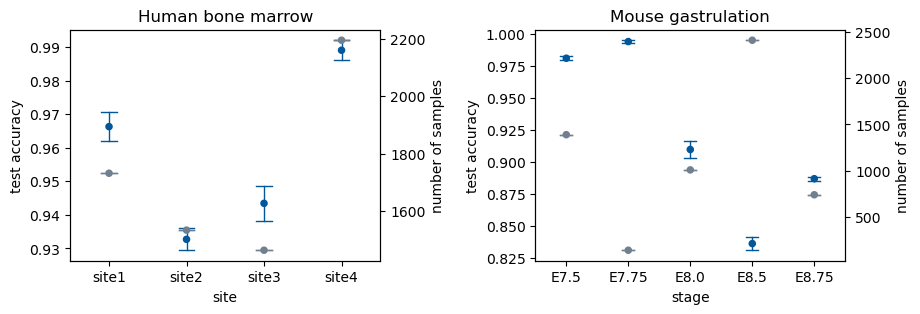

In [8]:
# load the two dataframes
df1 = pd.read_csv("../results/revision/human_bonemarrow_site_test_accuracy.csv")
df2 = pd.read_csv("../results/revision/mouse_gastrulation_stage_test_accuracy.csv")

palette = ["#015799", "slategray"]
pointplot_scale = 1.0
pointplot_errwidth = 1.0
pointplot_capsize = 0.2

# create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
# add spacing
fig.subplots_adjust(wspace=0.5)
# plot the test accuracy per site as points with error bars on the left axis, and plot the number of samples on the right axis (same subplot!)
sns.pointplot(
    data=df1,
    x="batch",
    y="test_accuracy",
    ax=ax[0],
    join=False,
    color=palette[0],
    errorbar="se",
    markers=".",
    scale=pointplot_scale,
    errwidth=pointplot_errwidth,
    capsize=pointplot_capsize,
)
ax0 = ax[0].twinx()
sns.pointplot(
    data=df1,
    x="batch",
    y="n_samples",
    ax=ax0,
    join=False,
    color=palette[1],
    errorbar="se",
    markers=".",
    scale=pointplot_scale,
    errwidth=pointplot_errwidth,
    capsize=pointplot_capsize,
)
ax[0].set_ylabel("test accuracy")
ax0.set_ylabel("number of samples")
ax[0].set_xlabel("site")
ax[0].set_title("Human bone marrow")

# now same for mouse gastrulation on ax[1]
sns.pointplot(
    data=df2,
    x="batch",
    y="test_accuracy",
    ax=ax[1],
    join=False,
    color=palette[0],
    errorbar="se",
    markers=".",
    scale=pointplot_scale,
    errwidth=pointplot_errwidth,
    capsize=pointplot_capsize,
)
ax1 = ax[1].twinx()
sns.pointplot(
    data=df2,
    x="batch",
    y="n_samples",
    ax=ax1,
    join=False,
    color=palette[1],
    errorbar="se",
    markers=".",
    scale=pointplot_scale,
    errwidth=pointplot_errwidth,
    capsize=pointplot_capsize,
)
ax[1].set_ylabel("test accuracy")
ax1.set_ylabel("number of samples")
ax[1].set_xlabel("stage")
ax[1].set_title("Mouse gastrulation")

plt.show()